In [2]:
import numpy as np                                                      #Basic Libraries for data extraction
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import xgboost

from xgboost import XGBRegressor                                        #Main model

from sklearn.metrics import mean_absolute_error                         #Metric Evaluation
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

from sklearn.model_selection import train_test_split
import pickle                                                           #For saving model

from sklearn.model_selection import GridSearchCV                        #Fine-tuning model

In [5]:
df_ex = pd.read_csv("BubbleGrowth_vs_Time.csv")                #Extracting ideal(experimental) data

df_ex

,pressure(bar),heat flux(kW/m2),mass fluxkg/(m2⋅s),sub cooling,channel dia(mm),d/dMax,t/tMax
0,3.0,165.000,400.0,10.0,3.63,0.151261,0.059814
1,3.0,165.000,400.0,10.0,3.63,0.262605,0.095607
2,3.0,165.000,400.0,10.0,3.63,0.348739,0.119413
3,3.0,165.000,400.0,10.0,3.63,0.376050,0.152570
4,3.0,165.000,400.0,10.0,3.63,0.424370,0.190169
...,...,...,...,...,...,...,...
2248,1.0,0.045,30.0,24.0,3.75,0.916238,0.824840
2249,1.0,0.045,30.0,24.0,3.75,0.939426,0.880710
2250,1.0,0.045,30.0,24.0,3.75,0.953692,0.913930
2251,1.0,0.045,30.0,24.0,3.75,0.992806,0.960740


In [6]:
df_ex.dropna(inplace=True)

In [7]:
xe = df_ex.drop("d/dMax", axis=1)                           #Formatting data
ye = df_ex["d/dMax"]

In [8]:
np.random.seed(42)

x_tre, x_tse, y_tre, y_tse = train_test_split(xe, ye, train_size=0.85)              #Train-test split

In [40]:
m_ex = XGBRegressor()

In [41]:
param_grid = {                                                                  #Parameter grid for GridSearchCV
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'gamma': [0, 0.1, 0.3]
}

In [44]:
reg = GridSearchCV(estimator = m_ex, param_grid = param_grid, cv = 10, verbose=2)

In [45]:
reg.fit(x_tre, y_tre)

Fitting 10 folds for each of 2187 candidates, totalling 21870 fits
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.7, 0.9],
                         'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.5, 0.7, 0.9]},
             verbose=2)

In [46]:
reg.score(x_tse, y_tse)                                                         #Final R2 score

0.8725024990854393

In [9]:
testingx1 = xe[:30]                                                             #Testing samples
testingy1 = ye[:30]
testingx2 = xe[30:59]
testingy2 = ye[30:59]
testingx3 = xe[59:92]
testingy3 = ye[59:92]
testingx4 = xe[92:105]
testingy4 = ye[92:105]
testingx5 = xe[105:115]
testingy5 = ye[105:115]

In [ ]:
yp1 = reg.predict(testingx1)                                                    #Sample predictions
yp2 = reg.predict(testingx2)
yp3 = reg.predict(testingx3)
yp4 = reg.predict(testingx4)
yp5 = reg.predict(testingx5)

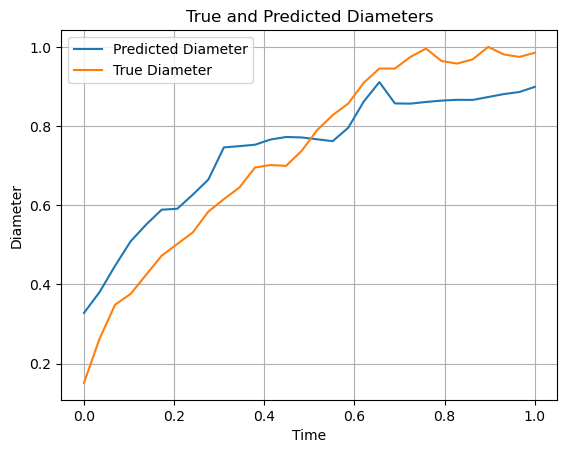

In [60]:
plt.plot(np.linspace(0, 1, len(yp1)), yp1, label = "Predicted Diameter")                    #True v/s Predicted D v/s t plot
plt.plot(np.linspace(0, 1, len(yp1)), testingy1, label = "True Diameter")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Diameter")
plt.title("True and Predicted Diameters")
plt.grid(True)
plt.show()

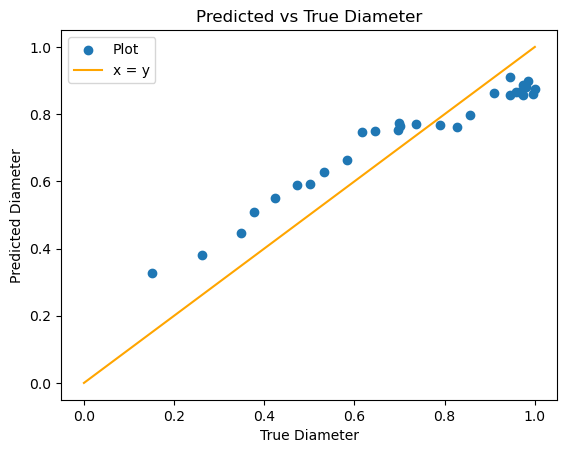

In [61]:
plt.scatter(testingy1, yp1, label = "Plot")                                             #Predicted v/s True Diameter
plt.xlabel('True Diameter')
plt.ylabel('Predicted Diameter')
plt.plot(np.linspace(0, 1), np.linspace(0, 1), color = "orange", label = "x = y")
plt.legend()
plt.title('Predicted vs True Diameter')
plt.show()

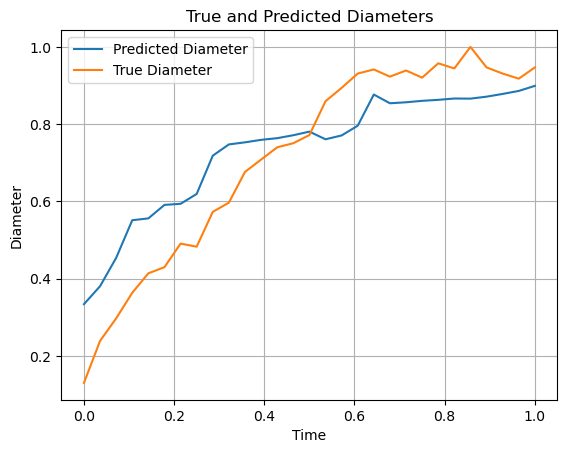

In [62]:
plt.plot(np.linspace(0, 1, len(yp2)), yp2, label = "Predicted Diameter")                    #True v/s Predicted D v/s t plot
plt.plot(np.linspace(0, 1, len(yp2)), testingy2, label = "True Diameter")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Diameter")
plt.title("True and Predicted Diameters")
plt.grid(True)
plt.show()

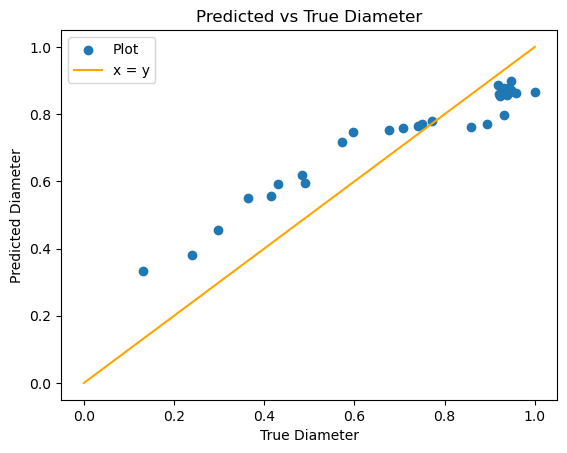

In [63]:
plt.scatter(testingy2, yp2, label = "Plot")                                                 #Predicted v/s True Diameter
plt.xlabel('True Diameter')
plt.ylabel('Predicted Diameter')
plt.plot(np.linspace(0, 1), np.linspace(0, 1), color = "orange", label = "x = y")
plt.legend()
plt.title('Predicted vs True Diameter')
plt.show()

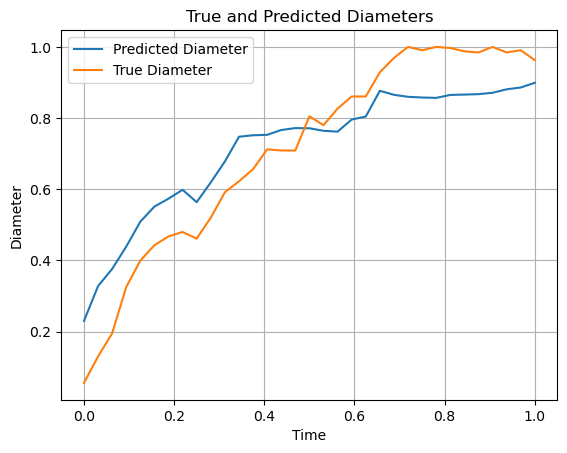

In [64]:
plt.plot(np.linspace(0, 1, len(yp3)), yp3, label = "Predicted Diameter")                        #True v/s Predicted D v/s t plot
plt.plot(np.linspace(0, 1, len(yp3)), testingy3, label = "True Diameter")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Diameter")
plt.title("True and Predicted Diameters")
plt.grid(True)
plt.show()

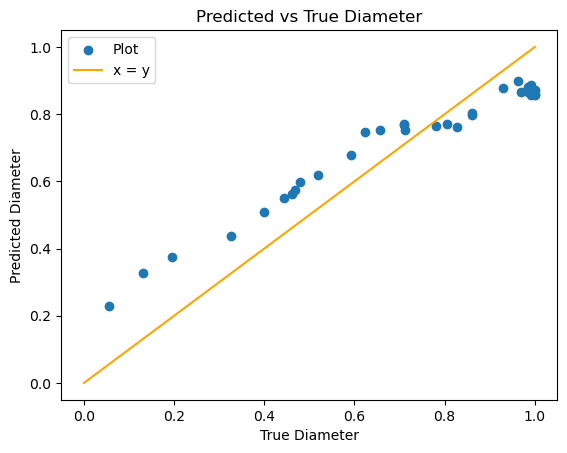

In [65]:
plt.scatter(testingy3, yp3, label = "Plot")                                                #Predicted v/s True Diameter
plt.xlabel('True Diameter')
plt.ylabel('Predicted Diameter')
plt.plot(np.linspace(0, 1), np.linspace(0, 1), color = "orange", label = "x = y")
plt.legend()
plt.title('Predicted vs True Diameter')
plt.show()

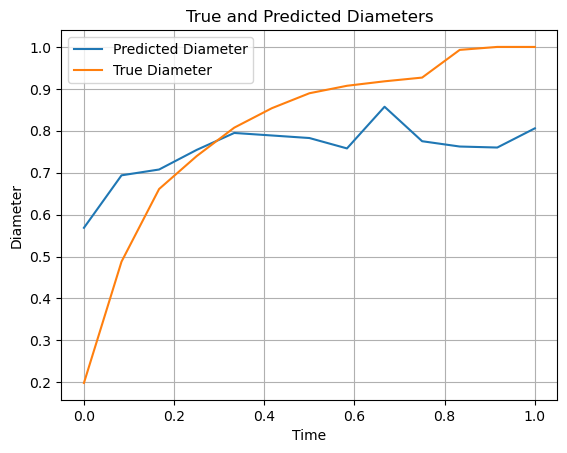

In [66]:
plt.plot(np.linspace(0, 1, len(yp4)), yp4, label = "Predicted Diameter")                    #True v/s Predicted D v/s t plot
plt.plot(np.linspace(0, 1, len(yp4)), testingy4, label = "True Diameter")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Diameter")
plt.title("True and Predicted Diameters")
plt.grid(True)
plt.show()

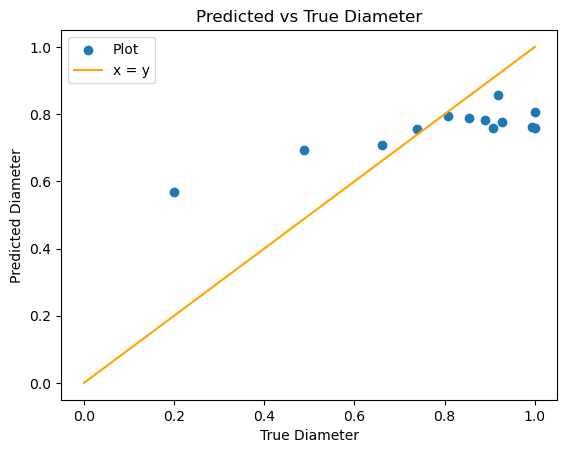

In [67]:
plt.scatter(testingy4, yp4, label = "Plot")                                             #Predicted v/s True Diameter
plt.xlabel('True Diameter')
plt.ylabel('Predicted Diameter')
plt.plot(np.linspace(0, 1), np.linspace(0, 1), color = "orange", label = "x = y")
plt.legend()
plt.title('Predicted vs True Diameter')
plt.show()

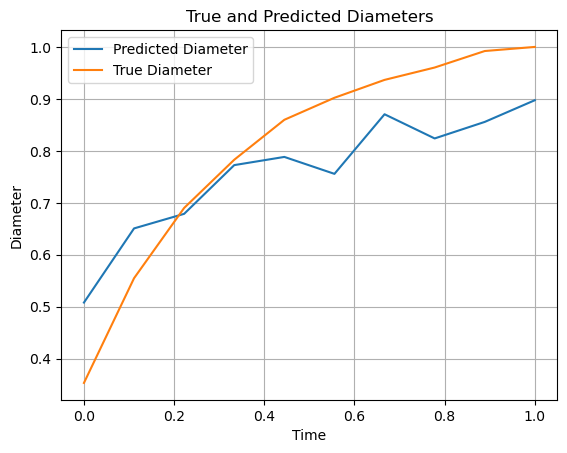

In [68]:
plt.plot(np.linspace(0, 1, len(yp5)), yp5, label = "Predicted Diameter")                        #True v/s Predicted D v/s t plot
plt.plot(np.linspace(0, 1, len(yp5)), testingy5, label = "True Diameter")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Diameter")
plt.title("True and Predicted Diameters")
plt.grid(True)
plt.show()

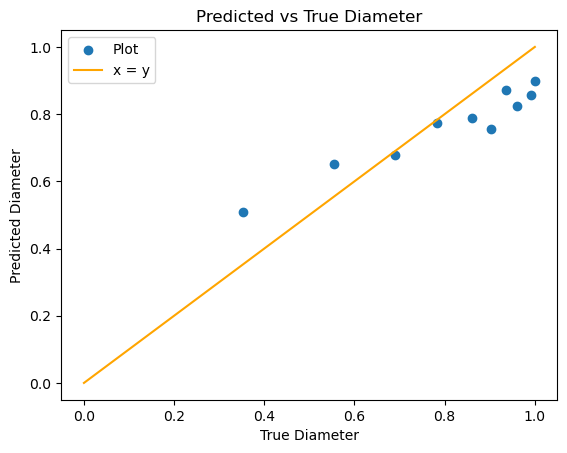

In [69]:
plt.scatter(testingy5, yp5, label = "Plot")                                             #Predicted v/s True Diameter
plt.xlabel('True Diameter')
plt.ylabel('Predicted Diameter')
plt.plot(np.linspace(0, 1), np.linspace(0, 1), color = "orange", label = "x = y")
plt.legend()
plt.title('Predicted vs True Diameter')
plt.show()

In [71]:
pickle.dump(reg, open('model_final.pkl', 'wb'))                             #Saving model

In [12]:
def evaluation(y_true , y_preds ):                                                  #Function to calculate Evaluation Metrics:-
    mean_absolute = mean_absolute_error(y_true , y_preds)                           #Mean Absolute Error
    median_absolute = median_absolute_error(y_true , y_preds)                       #Median Absolute Error
    mean_poisson = mean_poisson_deviance(y_true , y_preds)                          #Mean Poisson Deviance
    r2_scor = r2_score(y_true , y_preds)                                            #R2 Score
    explained_variance = explained_variance_score(y_true , y_preds)                 #Explained Variance Score
    
    print(f"the mean absolute error is  {mean_absolute }")
    print(f"the median absolute error is  {median_absolute }")
    print(f"the mean poisson deviance is  {mean_poisson}")
    print(f"the r2_score is  {r2_scor*100: .2f}")
    print(f"the explained_variance is  {explained_variance}")

In [13]:
evaluation(testingy1, yp1)

the mean absolute error is  0.0921967766290567
the median absolute error is  0.09341824583876651
the mean poisson deviance is  0.017078411852341022
the r2_score is   84.17
the explained_variance is  0.8426810626642378


In [14]:
evaluation(testingy2, yp2)

the mean absolute error is  0.0985424080518318
the median absolute error is  0.09457955436540533
the mean poisson deviance is  0.024132951039125123
the r2_score is   80.76
the explained_variance is  0.8134929854530497


In [15]:
evaluation(testingy3, yp3)

the mean absolute error is  0.1017634808199585
the median absolute error is  0.10467985069852292
the mean poisson deviance is  0.026222351027837914
the r2_score is   84.39
the explained_variance is  0.8444240018504391


In [16]:
evaluation(testingy4, yp4)

the mean absolute error is  0.14215365853704176
the median absolute error is  0.14939844935443725
the mean poisson deviance is  0.04990535551587238
the r2_score is   39.41
the explained_variance is  0.4329414832905185


In [17]:
evaluation(testingy5, yp5)

the mean absolute error is  0.09316503332977297
the median absolute error is  0.09919255303173524
the mean poisson deviance is  0.015925482472473374
the r2_score is   72.48
the explained_variance is  0.7704066564595479
